In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set display options
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Correct tickers for Gold and Silver futures
symbols = ['GC=F', 'SI=F']

# Download 10 years of daily data
data = yf.download(symbols, start='2014-06-01', end='2024-06-01')['Close']

# Calculate daily returns
returns = data.pct_change().dropna()

# Calculate rolling annualized volatility (252 trading days)
volatility = returns.rolling(window=252).std() * np.sqrt(252)

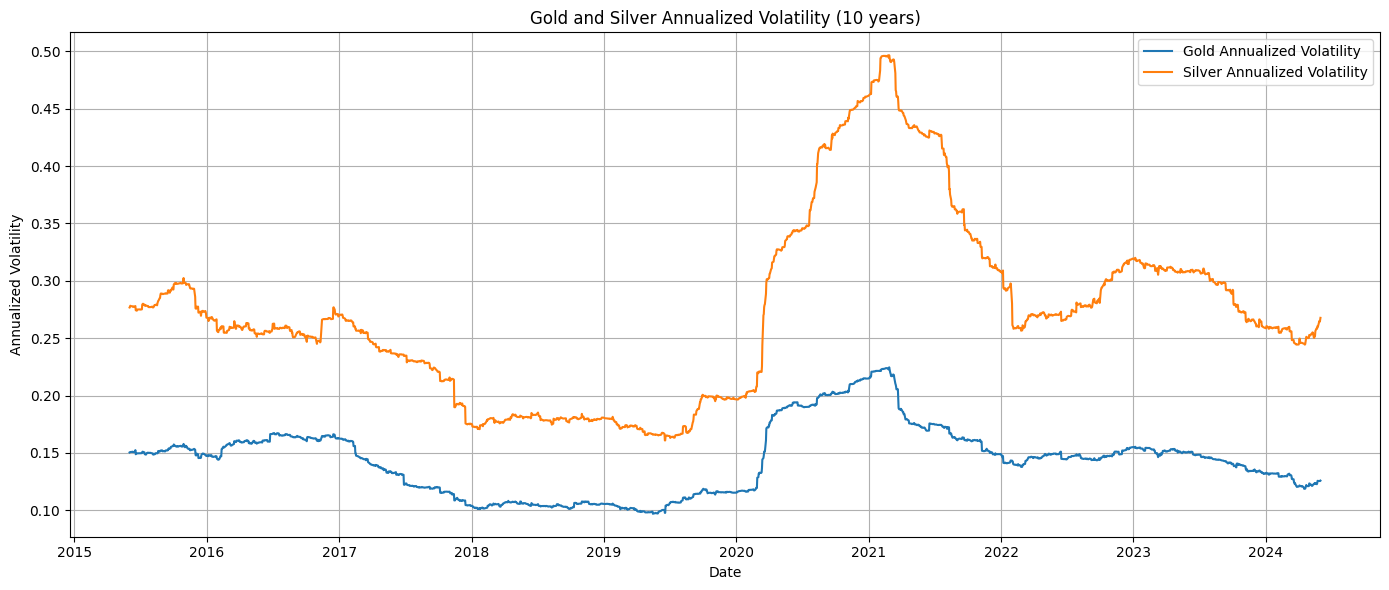

Average Annualized Volatility (2014-2024):
Ticker
GC=F   0.1438
SI=F   0.2727
dtype: float64


In [5]:
# Map tickers to display names
name_mapping = {
    'GC=F': 'Gold Annualized Volatility',
    'SI=F': 'Silver Annualized Volatility',
    'GLD': 'Gold Annualized Volatility',
    'SLV': 'Silver Annualized Volatility'
}

# Plot annualized volatility
plt.figure(figsize=(14,6))
for asset in symbols:
    plt.plot(volatility[asset], label=name_mapping[asset])

plt.title('Gold and Silver Annualized Volatility (10 years)')
plt.xlabel('Date')
plt.ylabel('Annualized Volatility')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Calculate average annualized volatility over the entire period
average_volatility = volatility.mean()
print("Average Annualized Volatility (2014-2024):")
print(average_volatility)

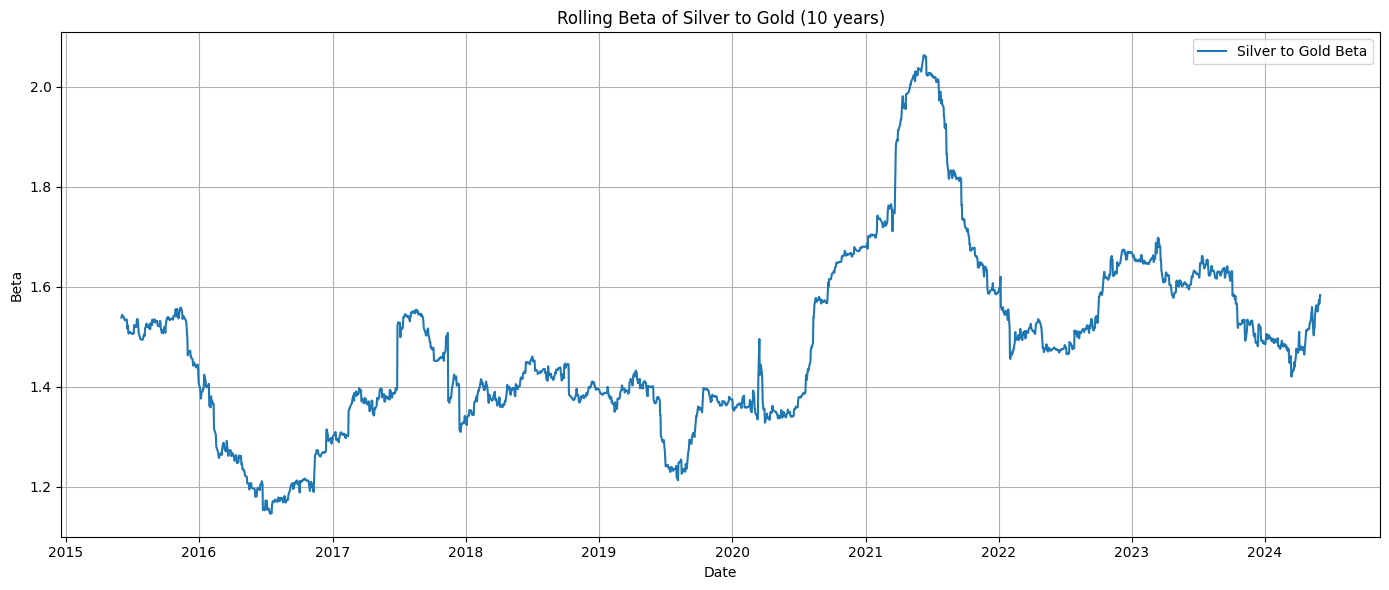

Average Beta of Silver to Gold (2014-2024): 1.4839


In [7]:
# === Calculate rolling beta of Silver to Gold ===
rolling_window = 252

# Covariance between Silver and Gold
covariance = returns['SI=F'].rolling(window=rolling_window).cov(returns['GC=F'])

# Variance of Gold
variance = returns['GC=F'].rolling(window=rolling_window).var()

# Beta = Cov(Silver, Gold) / Var(Gold)
beta = covariance / variance

# Plot Beta
plt.figure(figsize=(14,6))
plt.plot(beta, label='Silver to Gold Beta')
plt.title('Rolling Beta of Silver to Gold (10 years)')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Print average beta over entire period
average_beta = beta.mean()
print(f'Average Beta of Silver to Gold (2014-2024): {average_beta:.4f}')